<div style="text-align:center; font-size: 48px;">Titanic Competition Kaggle</div>
<div style="text-align:center; font-size: 36px;">Modeling</div>

# 0. Import Libraries


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


import lightgbm as lgb
import xgboost as xgb



# 1. Load processed data


In [2]:
train_df = pd.read_csv('../data/processed/train_processed.csv')
train_df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'Fare',
 'Embarked',
 'Title',
 'AgeGroup',
 'isfamilyonboard',
 'TicketGroupSize',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Rare']

In [3]:
X = train_df[[
            'Pclass',
            'Sex',
            'Age',
            'Fare',
            'Embarked',
            'AgeGroup',
            'isfamilyonboard',
            'TicketGroupSize',
            'Title_Miss',
            'Title_Mr',
            'Title_Mrs',
            'Title_Rare']]

y = train_df['Survived']

In [4]:
#setting Seed for all random operations
SEED = 20250708

categorical_features = ['Sex', 'Embarked', 'AgeGroup', 'isfamilyonboard', 'Title']
numerical_features = ['Age', 'Fare', 'TicketGroupSize']

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=SEED, shuffle=True)

In [6]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((668, 12), (223, 12), (668,), (223,))

In [7]:
# scaling datasets
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()


scaler = StandardScaler()
X_train_scaled[numerical_features] = scaler.fit_transform(X_train_scaled[numerical_features])
X_val_scaled[numerical_features] = scaler.transform(X_val_scaled[numerical_features])

# Modeling

In [8]:
Models = []

def result(name, model, accuracy):
    try:
        Models.append({
            'Model': name,
            'Model_object': model,
            'Accuracy': accuracy,
            'Parameters': model.get_params()
        })
    except:
        Models.append({
            'Model': name,
            'Model_object': model,
            'Accuracy': accuracy,
            'Parameters': None
        })

## Baseline Model

Assuming that Gender is the most important feature, we can create a simple baseline model that predicts survival based on the gender of the passengers.

In [9]:
# Baseline Model
y_pred = X_val['Sex']
temp = pd.concat([y_val, y_pred], axis=1)
temp.columns = ['y_val', 'y_pred']

# accuracy
accuracy0 = temp[temp['y_val'] == temp['y_pred']].shape[0] / temp.shape[0]
result('Baseline Model', None, accuracy0)
print(f"Baseline Model Accuracy: {accuracy0:.3f}")

Baseline Model Accuracy: 0.776


***Alternative Way***

*using a classification tree, with only one feature*

```python
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


model0 = DecisionTreeClassifier(random_state=SEED)
model0.fit(X_train['Sex'].values.reshape(-1, 1), y_train)

y_pred = model0.predict(X_val['Sex'].values.reshape(-1, 1))
accuracy0 = accuracy_score(y_val, y_pred)
print(f"Baseline Model Accuracy: {accuracy0:.3f}")
```

## Logistic Regression

In [10]:
model1 = LogisticRegression(random_state=SEED)
model1.fit(X_train_scaled, y_train)

y_pred1 = model1.predict(X_val_scaled)
accuracy1 = (y_pred1 == y_val).mean()

result('Logistic Regression', model1, accuracy1)
print(f"Logistic Regression Accuracy: {accuracy1:.3f}")

Logistic Regression Accuracy: 0.798


## K-Nearest Neighbors (KNN)


In [11]:
for k in range(1, 21):
    tempmodel = KNeighborsClassifier(n_neighbors=k)
    tempmodel.fit(X_train_scaled, y_train)

    temp_pred = tempmodel.predict(X_val_scaled)
    tempacc = accuracy_score(y_val, temp_pred)

    print(f"Accuracy: {tempacc:.3f}, k: {k}")

Accuracy: 0.753, k: 1
Accuracy: 0.798, k: 2
Accuracy: 0.798, k: 3
Accuracy: 0.816, k: 4
Accuracy: 0.780, k: 5
Accuracy: 0.816, k: 6
Accuracy: 0.803, k: 7
Accuracy: 0.803, k: 8
Accuracy: 0.803, k: 9
Accuracy: 0.816, k: 10
Accuracy: 0.803, k: 11
Accuracy: 0.803, k: 12
Accuracy: 0.798, k: 13
Accuracy: 0.812, k: 14
Accuracy: 0.807, k: 15
Accuracy: 0.816, k: 16
Accuracy: 0.807, k: 17
Accuracy: 0.816, k: 18
Accuracy: 0.821, k: 19
Accuracy: 0.825, k: 20


In [12]:
model2 = KNeighborsClassifier(n_neighbors=10)
model2.fit(X_train_scaled, y_train)

y_pred2 = model2.predict(X_val_scaled)
accuracy2 = accuracy_score(y_val, y_pred2)

result('K-Nearest Neighbors', model2, accuracy2)
print(f"K-Nearest Neighbors Accuracy: {accuracy2:.3f}")

K-Nearest Neighbors Accuracy: 0.816


## Decision Tree

In [13]:
model3 = DecisionTreeClassifier(random_state=SEED)
model3.fit(X_train_scaled, y_train)

y_pred3 = model3.predict(X_val_scaled)
accuracy3 = accuracy_score(y_val, y_pred3)

result('Decision Tree', model3, accuracy3)
print(f"Decision Tree Accuracy: {accuracy3:.3f}")

Decision Tree Accuracy: 0.771


## Random Forest

In [14]:
model4 = RandomForestClassifier(random_state=SEED)
model4.fit(X_train_scaled, y_train)

y_pred4 = model4.predict(X_val_scaled)
accuracy4 = accuracy_score(y_val, y_pred4)

result('Random Forest', model4, accuracy4)
print(f"Random Forest Accuracy: {accuracy4:.3f}")

Random Forest Accuracy: 0.780


## Gradient Boosting

In [15]:
model5 = GradientBoostingClassifier(random_state=SEED)
model5.fit(X_train_scaled, y_train)

y_pred5 = model5.predict(X_val_scaled)
accuracy5 = accuracy_score(y_val, y_pred5)

result('Gradient Boosting', model5, accuracy5)
print(f"Gradient Boosting Accuracy: {accuracy5:.3f}")

Gradient Boosting Accuracy: 0.830


### LightGBM

In [16]:
# Convert categorical features to 'category' dtype for LightGBM
lgb_x_train = X_train_scaled.copy().join(train_df['Title']).drop(columns=['Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare'])
lgb_x_train[categorical_features] = lgb_x_train[categorical_features].astype('category')

lgb_x_val = X_val_scaled.copy().join(train_df['Title']).drop(columns=['Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare'])
lgb_x_val[categorical_features] = lgb_x_val[categorical_features].astype('category')


# Train LightGBM model
model6 = lgb.LGBMClassifier(random_state=SEED, verbose=-1)
model6.fit(lgb_x_train, y_train)

y_pred6 = model6.predict(lgb_x_val)
accuracy6 = accuracy_score(y_val, y_pred6)

result('LightGBM', model6, accuracy6)
print(f"LightGBM Accuracy: {accuracy6:.3f}")

LightGBM Accuracy: 0.816


### XGBoost

In [17]:
# One-hot encode categorical features for XGBoost
xgboost_x_train = X_train_scaled.copy().join(train_df['Title'].astype('category')).drop(columns=['Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare'])
xgboost_x_val = X_val_scaled.copy().join(train_df['Title'].astype('category')).drop(columns=['Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare'])

model7 = xgb.XGBClassifier(random_state=SEED, enable_categorical=True)
model7.fit(xgboost_x_train, y_train)

y_pred7 = model7.predict(xgboost_x_val)
accuracy7 = accuracy_score(y_val, y_pred7)

result('XGBoost', model7, accuracy7)
print(f"XGBoost Accuracy: {accuracy7:.3f}")

XGBoost Accuracy: 0.834


### CatBoost

In [18]:
from catboost import CatBoostClassifier, Pool

temp_x_train = xgboost_x_train.copy()
temp_x_val = xgboost_x_val.copy()

# create Pool objects for CatBoost
train_pool = Pool(data=temp_x_train, label=y_train, cat_features=categorical_features)
val_pool = Pool(data=temp_x_val, label=y_val, cat_features=categorical_features)

model8 = CatBoostClassifier(random_state=SEED, verbose=0, iterations=100)
model8.fit(train_pool)

y_pred8 = model8.predict(val_pool)
accuracy8 = accuracy_score(y_val, y_pred8)

result('CatBoost', model8, accuracy8)
print(f"CatBoost Accuracy: {accuracy8:.3f}")

CatBoost Accuracy: 0.812


# Model Selection

(0.7, 1.0)

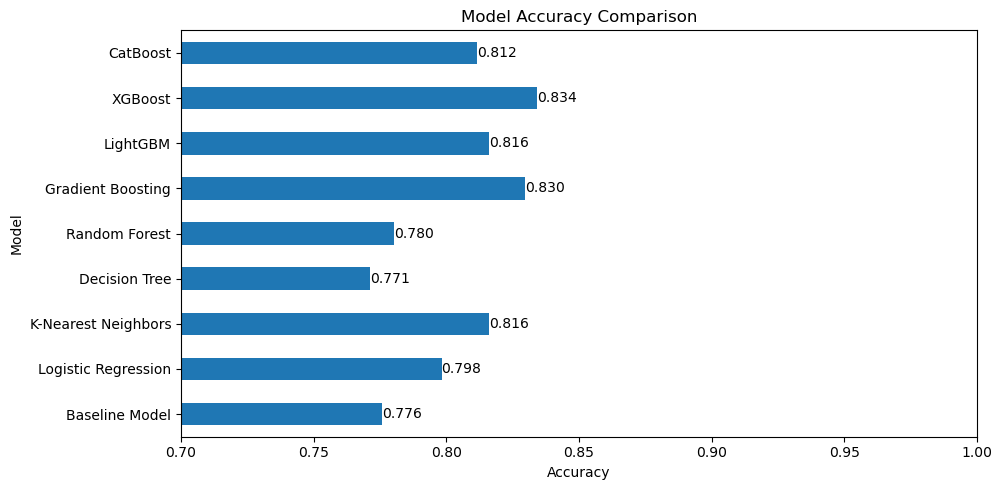

In [19]:
pd.DataFrame(Models).plot (y='Accuracy', x='Model', kind='barh', figsize=(10, 5), legend=False, rot=0)
#show values on bars
for index, value in enumerate(pd.DataFrame(Models)['Accuracy']):
    plt.text(value, index, f'{value:.3f}', va='center')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.tight_layout()
plt.xlim(0.7, 1)

# Cross-validation

In [22]:
# Cross-validation for XGBoost model

cv_scores = cross_val_score(model7, xgboost_x_train, y_train, cv=5, scoring='accuracy')
print(f"Cv scores: {np.sort(cv_scores)}")
print(f"Model 7 Cross-Validation Accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")


Cv scores: [0.76691729 0.79850746 0.80597015 0.81203008 0.82089552]
Model 7 Cross-Validation Accuracy: 0.801 ± 0.018


In [21]:
# Cross-validation for Gradient Boosting model

cv_scores = cross_val_score(model5, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cv scores: {np.sort(cv_scores)}")
print(f"Model 5 Cross-Validation Accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

Cv scores: [0.79699248 0.79699248 0.81343284 0.82089552 0.86567164]
Model 5 Cross-Validation Accuracy: 0.819 ± 0.025


# Hyperparameter tuning

## XGBoost


In [23]:
# Final model = model7, XGBoost

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.0001, 0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'gamma': [0, 1, 5]                   
}

gsxgboost = GridSearchCV(
    estimator=model7,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1
)

gsxgboost.fit(xgboost_x_train, y_train)
print(f"Best parameters: {gsxgboost.best_params_}")
print(f"Best score: {gsxgboost.best_score_:.3f}")
print(f"Best Cross-Validation Accuracy: {gsxgboost.best_score_:.3f} ± {gsxgboost.cv_results_['std_test_score'][gsxgboost.best_index_]:.3f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'gamma': 5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best score: 0.828
Best Cross-Validation Accuracy: 0.828 ± 0.036


## Gradient Boosting

In [24]:
# Final model = model5, GradientBoostingClassifier

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'max_features': [None , 'sqrt', 'log2']
}

gsgradientboosting = GridSearchCV(
    estimator=model5,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1
)

gsgradientboosting.fit(X_train_scaled, y_train)
print(f"Best parameters: {gsgradientboosting.best_params_}")
print(f"Best score: {gsgradientboosting.best_score_:.3f}")
print(f"Best Cross-Validation Accuracy: {gsgradientboosting.best_score_:.3f} ± {gsgradientboosting.cv_results_['std_test_score'][gsgradientboosting.best_index_]:.3f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 200, 'subsample': 1.0}
Best score: 0.826
Best Cross-Validation Accuracy: 0.826 ± 0.023


# Final Evaluation

📌 Interpretation:
- XGBoost gives the highest accuracy (0.828), but with more variance, meaning it might be less stable on unseen data.
- GradientBoostingClassifier has very close accuracy (0.826) but with lower standard deviation, which indicates more consistent performance.
- Manual cross-validation also shows higher average performance for GradientBoosting (0.819 vs. 0.801).

In [26]:
gsxgboost.best_params_

{'gamma': 5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

In [29]:
xgb_model = xgb.XGBClassifier(
    n_estimators=gsxgboost.best_params_['n_estimators'],
    learning_rate=gsxgboost.best_params_['learning_rate'],
    max_depth=gsxgboost.best_params_['max_depth'],
    gamma=gsxgboost.best_params_['gamma'],
    random_state=SEED,
    enable_categorical=True)

xgb_model.fit(xgboost_x_train, y_train)
y_pred_xgb = xgb_model.predict(xgboost_x_val)

accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
print(f"Final XGBoost Model Accuracy: {accuracy_xgb:.3f}")
print(f"precision: {precision_score(y_val, y_pred_xgb):.3f}")
print(f"recall: {recall_score(y_val, y_pred_xgb):.3f}")
print(f"f1-score: {f1_score(y_val, y_pred_xgb):.3f}")
print("------------------------------")
print(f"Confusion Matrix:\n{confusion_matrix(y_val, y_pred_xgb)}")
print("------------------------------")
print(f"Classification Report:\n{classification_report(y_val, y_pred_xgb)}")

Final XGBoost Model Accuracy: 0.812
precision: 0.785
recall: 0.713
f1-score: 0.747
------------------------------
Confusion Matrix:
[[119  17]
 [ 25  62]]
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       136
           1       0.78      0.71      0.75        87

    accuracy                           0.81       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223



In [30]:
gsgradientboosting.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'subsample': 1.0}

In [31]:
gbs_model = GradientBoostingClassifier(
    n_estimators=gsgradientboosting.best_params_['n_estimators'],
    learning_rate=gsgradientboosting.best_params_['learning_rate'],
    max_depth=gsgradientboosting.best_params_['max_depth'],
    subsample=gsgradientboosting.best_params_['subsample'],
    max_features=gsgradientboosting.best_params_['max_features'],
    random_state=SEED)

gbs_model.fit(X_train_scaled, y_train)
y_pred_gbs = gbs_model.predict(X_val_scaled)

accuracy_gbs = accuracy_score(y_val, y_pred_gbs)
print(f"Final Gradient Boosting Model Accuracy: {accuracy_gbs:.3f}")
print(f"precision: {precision_score(y_val, y_pred_gbs):.3f}")
print(f"recall: {recall_score(y_val, y_pred_gbs):.3f}")
print(f"f1-score: {f1_score(y_val, y_pred_gbs):.3f}")
print("------------------------------")
print(f"Confusion Matrix:\n{confusion_matrix(y_val, y_pred_gbs)}")
print("------------------------------")
print(f"Classification Report:\n{classification_report(y_val, y_pred_gbs)}")

Final Gradient Boosting Model Accuracy: 0.830
precision: 0.802
recall: 0.747
f1-score: 0.774
------------------------------
Confusion Matrix:
[[120  16]
 [ 22  65]]
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       136
           1       0.80      0.75      0.77        87

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223



### 🧠 **Model Performance Summary: Gradient Boosting vs. XGBoost**

The models show similar overall performance but differ in their handling of the positive class (class 1 - likely survivors):

---

#### 🔹 **XGBoost**

* **Accuracy:** 0.812  
* **Precision (class 1):** 0.78  
* **Recall (class 1):** 0.71  
* **F1-score (class 1):** 0.75  
* Shows **higher precision** than recall for class 1, indicating fewer false positives but more false negatives.  
* **Slightly less recall** than Gradient Boosting for class 1.

---

#### 🔹 **Gradient Boosting**

* **Accuracy:** 0.830  
* **Precision (class 1):** 0.80  
* **Recall (class 1):** 0.75  
* **F1-score (class 1):** 0.77  
* Overall **more balanced and slightly better** on class 1 metrics.  
* **Higher F1-score and recall** than XGBoost on class 1.

---

#### ✅ **Conclusion**

* As if the goal is to **identify as many survivors as possible** (i.e., prioritize **recall** for class 1), **Gradient Boosting performs slightly better**.
* While both models are close, **Gradient Boosting** achieves higher **recall and F1-score** for the positive class.

> **Gradient Boosting offers more value due to its stronger performance on survivor detection (class 1).**


In [36]:
import joblib 

joblib.dump(gbs_model, '../output/gradient_boosting_model.pkl')
joblib.dump(scaler, '../output/scaler.pkl')

['../output/scaler.pkl']